In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
os.getcwd()

'C:\\Users\\arpit\\Desktop\\Spring 18\\Python\\Exam 1 Assignment'

In [2]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
dataset.shape

(7043, 21)

In [4]:
dataset.head().T #Transposed for easier visualization

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
dataset['SeniorCitizen']=pd.Categorical(dataset['SeniorCitizen']) #Changing from int to categorical
#dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'])
dataset.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

In [6]:
dataset=dataset[dataset['TotalCharges']!=" "]
#data['customerID'].T
#index=list(data.index.values)
#dataset.drop(488)
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'])
dataset.shape

(7032, 21)

In [7]:
del dataset["customerID"] # Deleting the custumerID column

deleted the custumerID since it doesn’t help to predict if the client is going to leave

Part 2 checking for NA and cleaning my dataset

In [8]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data is almost complete so I will just drop the few NA rows data has null values

In [9]:
numerics = ['float64', 'int64']
numeric_ds = dataset.select_dtypes(include=numerics)
objects_ds = dataset.select_dtypes(exclude=numerics)

In [10]:
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
objects_ds.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [12]:
dataset.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

##### This gives us an idea of how our data looks like, now we will dive into the graphics that will help us understand better our variables and how do they relate with each other.

# Basic Visualization to get to know more about our dataset 


[]

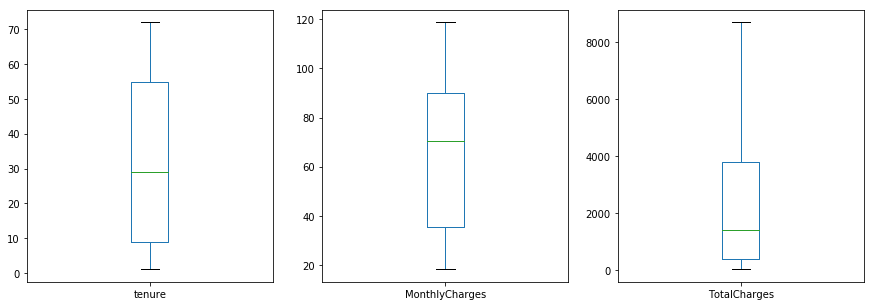

In [13]:
# box plots
numeric_ds.plot(kind='box',subplots=True, figsize=(15,5))
plt.plot()

[]

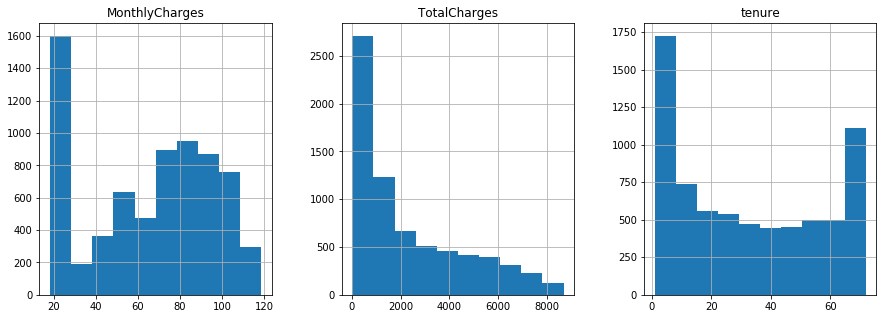

In [14]:
# histogram plots
numeric_ds.hist(layout=(1,3), figsize=(15,5))
plt.plot()

The box plot and histogram shows us that our numerical variables are not normally distributed, now we will check how they relate to the variable we are trying to predict and aggregate those variable in bins

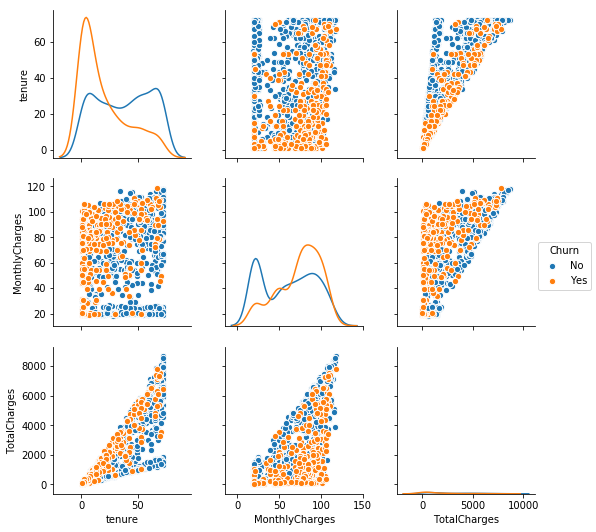

In [15]:
numeric_ds = pd.concat([numeric_ds,dataset["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset

g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

Both the ‘tenure’ and the ‘MonthlyCharges’ are looking like good predictors of the ‘Churn’ variable, we can check with the violin plot to decide the bins we are going to use.

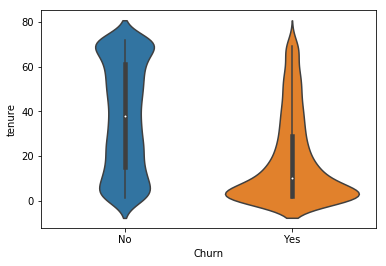

In [16]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

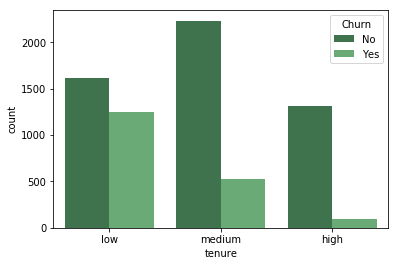

In [17]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

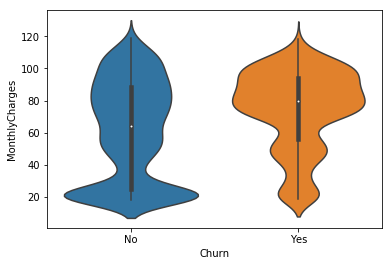

In [18]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

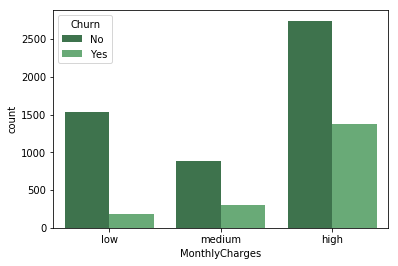

In [19]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

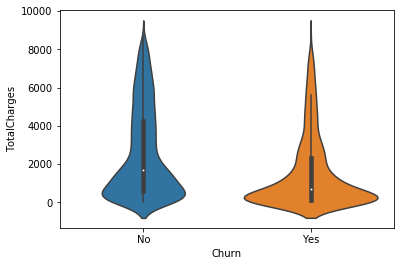

In [20]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

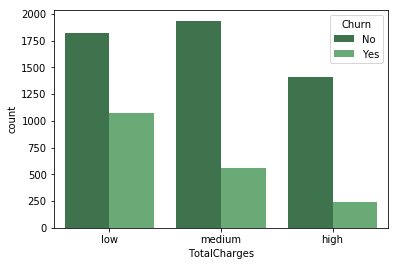

In [21]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

dividing all three numerical variables in 3 bins according to the violin plot trying to separate then in a way to distinguish the low churn rate areas from the high churn rate areas and you can see from the count plots how the distribution is different in each bin, I will save then into another data frame now.

# Numeric against categorical plots

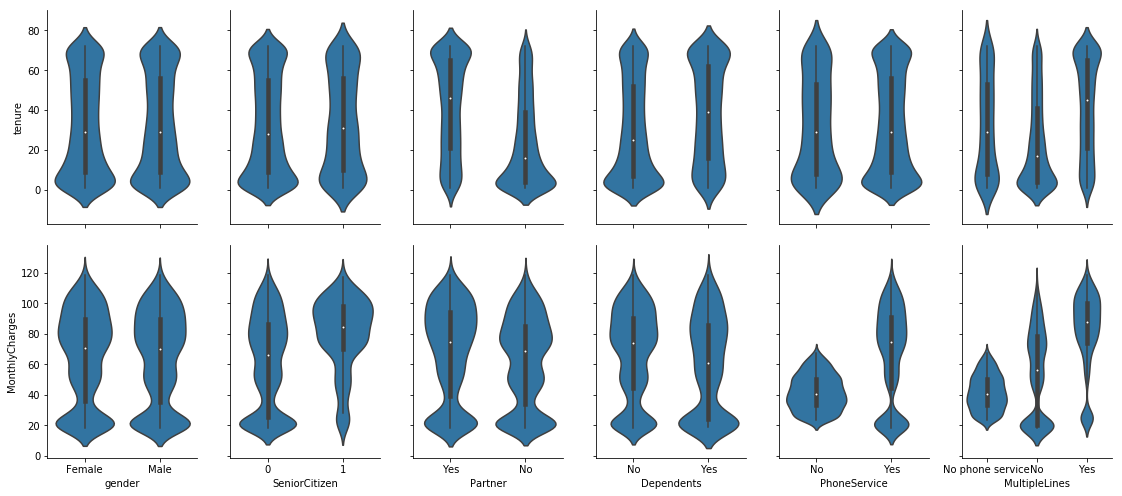

In [22]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[0:6].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot)

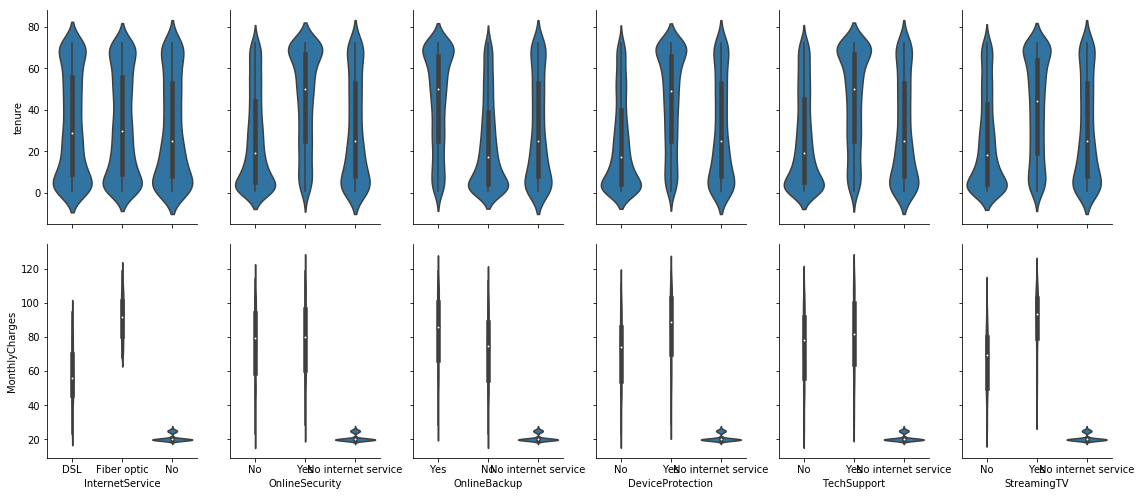

In [23]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[6:12].values,  
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

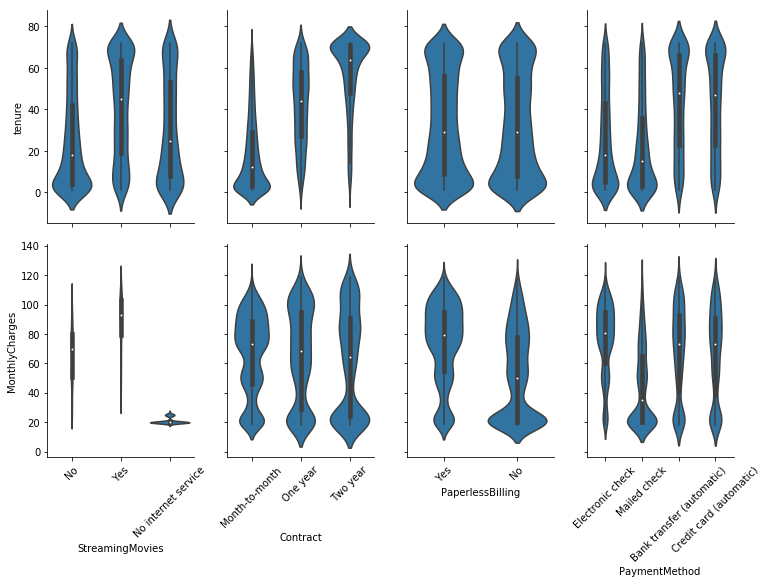

In [24]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[12:16].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
for ax in g.axes.flat:
   for tick in ax.get_xticklabels():
      tick.set_rotation(45)
g.map(sns.violinplot);

Those plots shows us how each of the categorical variables relates to the numerical variables, for example the clients which the Payment method is electronic or mailed check have a lower tenure and we can also see the variables that does not influence the tenure or Monthly Payment like the gender, this is important for when we design the retention campaigns so we know where we can focus, but we still don’t know the variables that influences the most so we can focus on the variables that will give us the best return and we also would like to know the clients with the highest chance of leaving.

# Categorical Plots

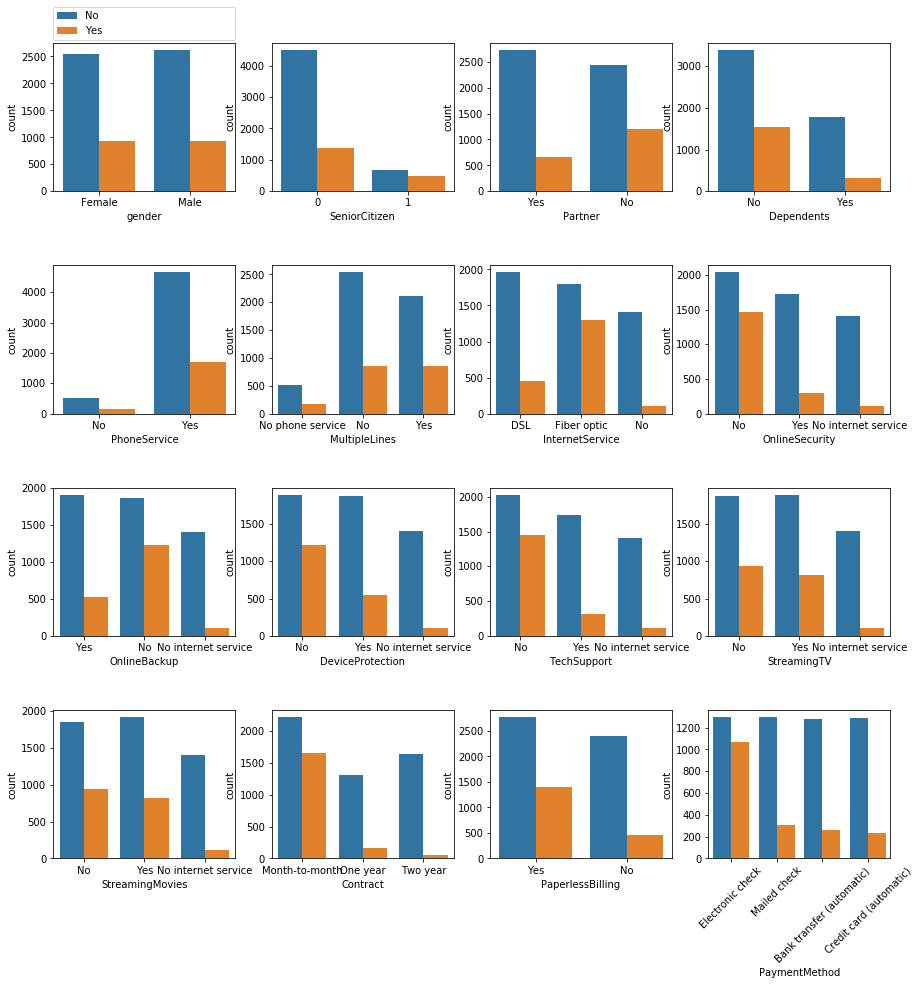

In [25]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

# Machine Learning Models

Split Train and Test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

In [28]:
data=pd.concat([bins,objects_ds],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors

In [29]:

features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Training Models

Here we will use the kfold method to compare different models and I will use the best model to predict the test data

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
scoring = 'accuracy'
models = []
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Here we can see that the logistics regression gives you the best result from all of the above method we used

# Using these model on the test data

In [31]:
# Make predictions on validation dataset
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7945984363894811
[[918  99]
 [190 200]]
             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1017
          1       0.67      0.51      0.58       390

avg / total       0.78      0.79      0.79      1407



The above results shows that it is good model and top of the that we can see which varible is important by ploting a graph against each othe rwith respect to their coefficient value

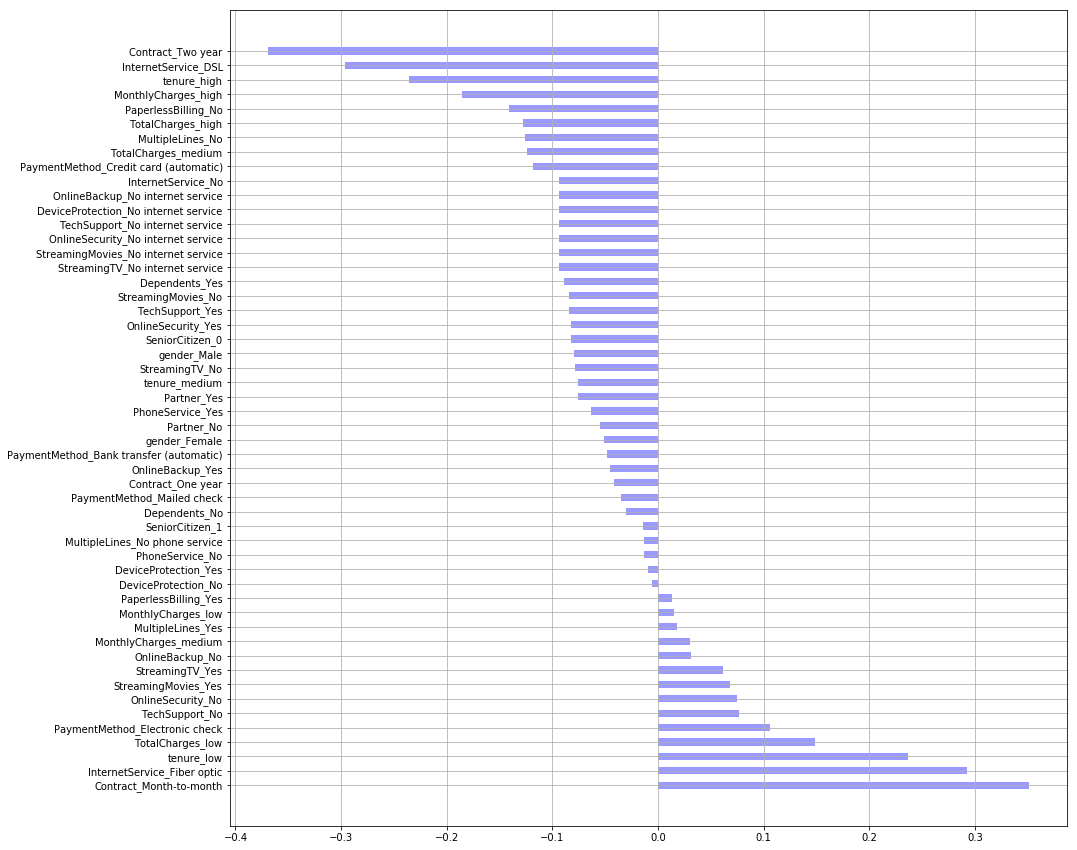

In [32]:
coefs = np.std(X_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.5
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])
plt.grid()
plt.show()

Now we can do the probability estimation that the customer will leave or not

In [33]:
from sklearn.cross_validation import KFold
import warnings
warnings.filterwarnings('ignore')

def run_prob_cv(X, y, clf_class, **kwargs):
    kf = KFold(len(y),n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

c:\users\arpit\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
pred_prob = run_prob_cv(X, Y, LogisticRegression)
pred_churn = pred_prob[:,1]
is_churn = Y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)

# calculate true probabilities
true_prob = {}
for prob in counts.index:
 true_prob[prob] = np.mean(is_churn[pred_churn == prob])
 true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts["probability"] = pd.cut(counts["pred_prob"], bins=np.arange(0,1.1,0.1), labels=["%.2f"%number for number in np.arange(0,1,0.1)])
counts.groupby("probability").agg({'count':['sum'],'pred_prob':['mean'],'true_prob': ['mean']})

,count,pred_prob,true_prob
,sum,mean,mean
probability,,,
0.00,2629,0.038522,0.041955
0.10,1029,0.147944,0.138653
0.20,652,0.249378,0.259742
0.30,653,0.349208,0.332122
0.40,597,0.447506,0.409677
0.50,491,0.549201,0.551465
0.60,503,0.646670,0.658202
0.70,387,0.746578,0.737652


# Conclusion
**So with the numerical and categorical plots we were able to start answering the questions that we introduced at the beginning of this project of which variables influences if the client will leave. The logistic regression model helped us to know the most important features to predict if the client will leave and the probabilistic model was the one able to show us the clients with highest chance of leaving

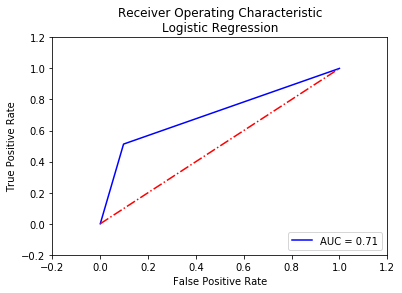

In [38]:
auc=metrics.roc_auc_score(Y_validation,predictions)
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_validation,predictions)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()